In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [7]:
df = pd.read_csv(r"C:\Users\Namrata Patil\Desktop\bana698proj\culminating-project-group-1\Week 6\Group1DatasetCleaned.csv")
df.head()

CountryShortName    Year  Life expectancy at birth, female (years)  \
0      Afghanistan  2008.0                                    61.529   
1      Afghanistan  2009.0                                    61.892   
2      Afghanistan  2010.0                                    62.408   
3      Afghanistan  2011.0                                    62.993   
4      Afghanistan  2012.0                                    63.514   

   Life expectancy at birth, male (years)  \
0                                  58.172   
1                                  58.820   
2                                  59.278   
3                                  59.825   
4                                  60.317   

   Life expectancy at birth, total (years)  \
0                                   59.852   
1                                   60.364   
2                                   60.851   
3                                   61.419   
4                                   61.923   

   GOAL 13: Climate Action (5 year moving average)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Pillar 3 - Data Products - Score  \
0                          50.95000   
1                          50.20625   
2                          46.65625   
3                          47.91875   
4                          49.16875   

   GOAL 10: Reduced Inequality (5 year moving average)  \
0                                                0.5     
1                                                0.5     
2                                                0.5     
3                                                0.4     
4                                                0.4     

   GOAL 11: Sustainable Cities and Communities (5 year moving average)  \
0                                                0.0                     
1                                                0.0                     
2                                                0.0                     
3                                                0.0                     
4                                                0.0                     

   GOAL 12: Responsible Consumption and Production (5 year moving average)  \
0                                              1.000                         
1                                              1.000                         
2                                              0.667                         
3                                              0.667                         
4                                              0.667                         

   ...  Region_Europe & Central Asia  Region_Latin America & Caribbean  \
0  ...                             0                                 0   
1  ...                             0                                 0   
2  ...                             0                                 0   
3  ...                             0                                 0   
4  ...                             0                                 0   

   Region_Middle East & North Africa  Region_North America  Region_South Asia  \
0                                  0                     0                  1   
1                                  0                     0                  1   
2                                  0                     0                  1   
3                                  0                     0                  1   
4                                  0                     0                  1   

   Region_Sub-Saharan Africa  Income Group_High income  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0      

# Descriptive Statistics and Trends

In [8]:
df.shape

(2886, 286)

In [9]:
df.describe()

Year  Life expectancy at birth, female (years)  \
count  2886.000000                               2886.000000   
mean   2012.443520                                 73.536763   
std       5.047514                                  8.775818   
min    2004.000000                                 43.356000   
25%    2008.000000                                 67.924750   
50%    2012.000000                                 76.010000   
75%    2017.000000                                 80.104500   
max    2021.000000                                 87.710000   

       Life expectancy at birth, male (years)  \
count                             2886.000000   
mean                                68.354383   
std                                  8.144277   
min                                 40.689000   
25%                                 62.836000   
50%                                 69.243500   
75%                                 74.473250   
max                                 82.100000   

       Life expectancy at birth, total (years)  \
count                              2886.000000   
mean                                 70.889920   
std                                   8.374904   
min                                  42.125000   
25%                                  65.414500   
50%                                  72.567646   
75%                                  77.106750   
max                                  84.560000   

       GOAL 13: Climate Action (5 year moving average)  \
count                                      2886.000000   
mean                                          0.587900   
std                                           0.446186   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.800000   
75%                                           1.000000   
max                                           1.000000   

       Pillar 3 - Data Products - Score  \
count                       2886.000000   
mean                          60.091745   
std                           11.641004   
min                           29.462500   
25%                           51.520625   
50%                           60.443750   
75%                           68.209375   
max                           94.187500   

       GOAL 10: Reduced Inequality (5 year moving average)  \
count                                        2886.000000     
mean                                            0.490441     
std                                             0.128522     
min                                             0.034568     
25%                                             0.400000     
50%                                             0.500000     
75%                                             0.500000     
max                                             0.946752     

       GOAL 11: Sustainable Cities and Communities (5 year moving average)  \
count                                        2886.000000                     
mean                                            0.450455                     
std                                             0.328446                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.500000                     
75%                                             0.667000                     
max                                             1.000000                     

       GOAL 12: Responsible Consumption and Production (5 year moving average)  \
count                                        2886.000000                         
mean                                            0.510519                         
std                                             0.248688                         
min                                        

summary = df.describe().transpose().round(2)
summary.to_csv("basic_stats.csv")

# Filter for the required years
years_of_interest = [2004, 2009, 2014, 2019, 2021]
df_years = df[df['Year'].isin(years_of_interest)]

# Pivot the data
leb_table = df_years.pivot_table(
    index='CountryShortName',
    columns='Year',
    values='Life expectancy at birth, total (years)'
)

# Rename columns (just use the year as column name)
leb_table.columns = [str(int(col)) for col in leb_table.columns]

# Calculate percent growth from 2004 to 2021 and format with %
percent_growth = ((leb_table["2021"] - leb_table["2004"]) / leb_table["2004"]) * 100
leb_table["Growth (%)"] = percent_growth.round(2).astype(str) + "%"

# Round LEB values to 2 decimals
leb_table = leb_table.round(2)

# Export to CSV
leb_table.to_csv("leb_growth_table.csv")

#### Distribution of Life Expectancy at Birth

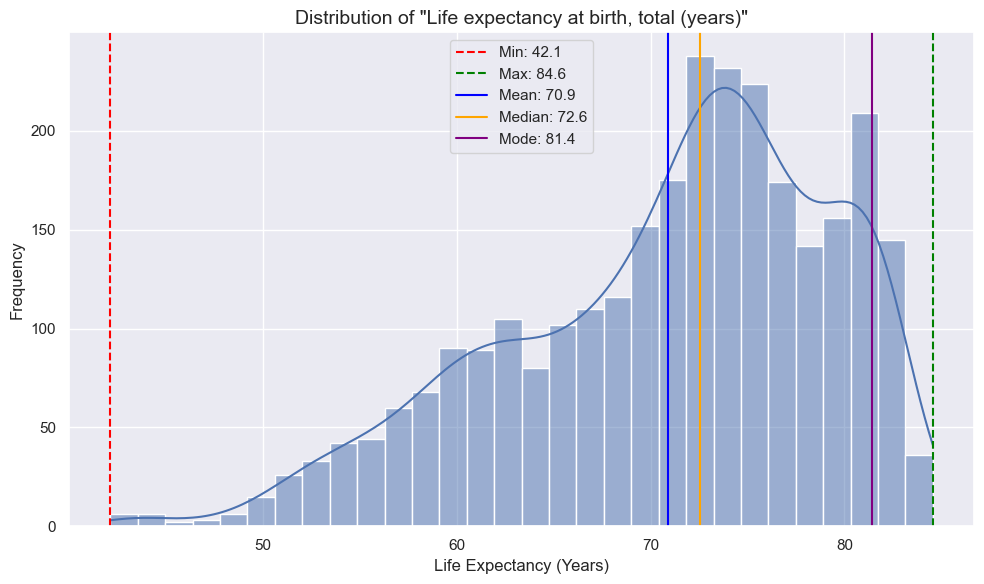

In [10]:
# Plotting the distribution of life expectancy (total)
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy at birth, total (years)'], kde=True, bins=30)

# Get the min and max of the Life expectancy at birth (total)
min_value = df['Life expectancy at birth, total (years)'].min()
max_value = df['Life expectancy at birth, total (years)'].max()

# Calculate mean, median, and mode
mean_val = df['Life expectancy at birth, total (years)'].mean()
median_val = df['Life expectancy at birth, total (years)'].median()
mode_val = df['Life expectancy at birth, total (years)'].mode()[0]

# Add vertical lines for min, max, mean, median, mode
plt.axvline(min_value, color='red', linestyle='--', label=f'Min: {min_value:.1f}')
plt.axvline(max_value, color='green', linestyle='--', label=f'Max: {max_value:.1f}')
plt.axvline(mean_val, color='blue', linestyle='-', label=f'Mean: {mean_val:.1f}')
plt.axvline(median_val, color='orange', linestyle='-', label=f'Median: {median_val:.1f}')
plt.axvline(mode_val, color='purple', linestyle='-', label=f'Mode: {mode_val:.1f}')

# Add title and labels
plt.title('Distribution of "Life expectancy at birth, total (years)"', fontsize=14)
plt.xlabel('Life Expectancy (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show legend
plt.legend()

# Display grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

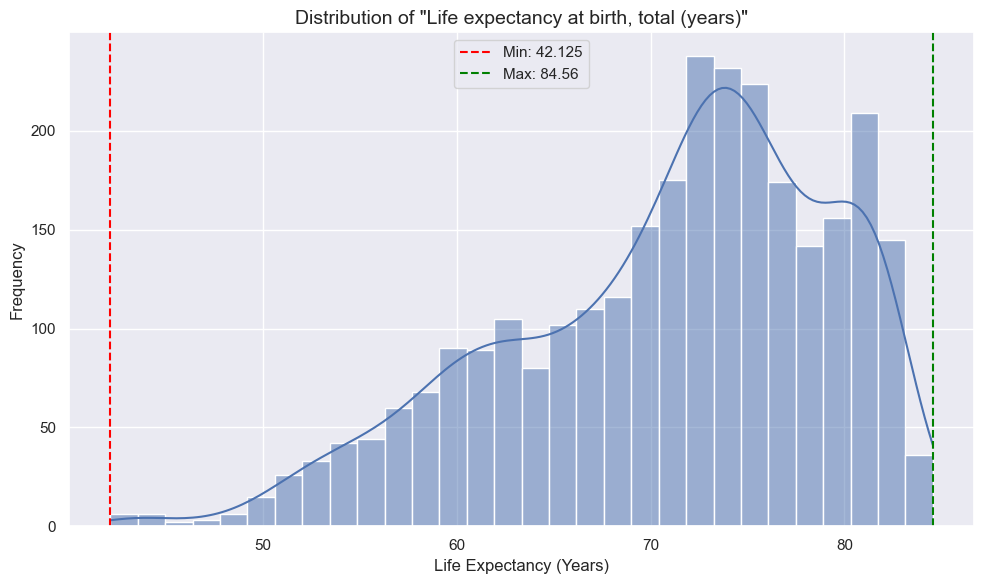

In [7]:
# Plotting the distribution of life expectancy (total)
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy at birth, total (years)'], kde=True, bins=30)

# Get the min and max of the Life expectancy at birth (total)
min_value = df['Life expectancy at birth, total (years)'].min()
max_value = df['Life expectancy at birth, total (years)'].max()

# Add vertical lines for min and max
plt.axvline(min_value, color='red', linestyle='--', label=f'Min: {min_value}')
plt.axvline(max_value, color='green', linestyle='--', label=f'Max: {max_value}')

# Add title and labels
plt.title('Distribution of "Life expectancy at birth, total (years)"',fontsize=14)
plt.xlabel('Life Expectancy (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show legend
plt.legend()

# Display grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# Plotting the distribution of life expectancy (total)
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy at birth, total (years)'], kde=True, bins=30)

# Get the min and max of the Life expectancy at birth (total)
min_value = df['Life expectancy at birth, total (years)'].min()
max_value = df['Life expectancy at birth, total (years)'].max()

# Calculate mean, median, and mode
mean_val = df['Life expectancy at birth, total (years)'].mean()
median_val = df['Life expectancy at birth, total (years)'].median()
mode_val = df['Life expectancy at birth, total (years)'].mode()[0]

# Add vertical lines for min, max, mean, median, mode
plt.axvline(min_value, color='red', linestyle='--', label=f'Min: {min_value:.1f}')
plt.axvline(max_value, color='green', linestyle='--', label=f'Max: {max_value:.1f}')
plt.axvline(mean_val, color='blue', linestyle='-', label=f'Mean: {mean_val:.1f}')
plt.axvline(median_val, color='orange', linestyle='-', label=f'Median: {median_val:.1f}')
plt.axvline(mode_val, color='purple', linestyle='-', label=f'Mode: {mode_val:.1f}')

# Add title and labels
plt.title('Distribution of "Life expectancy at birth, total (years)"', fontsize=14)
plt.xlabel('Life Expectancy (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show legend
plt.legend()

# Display grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

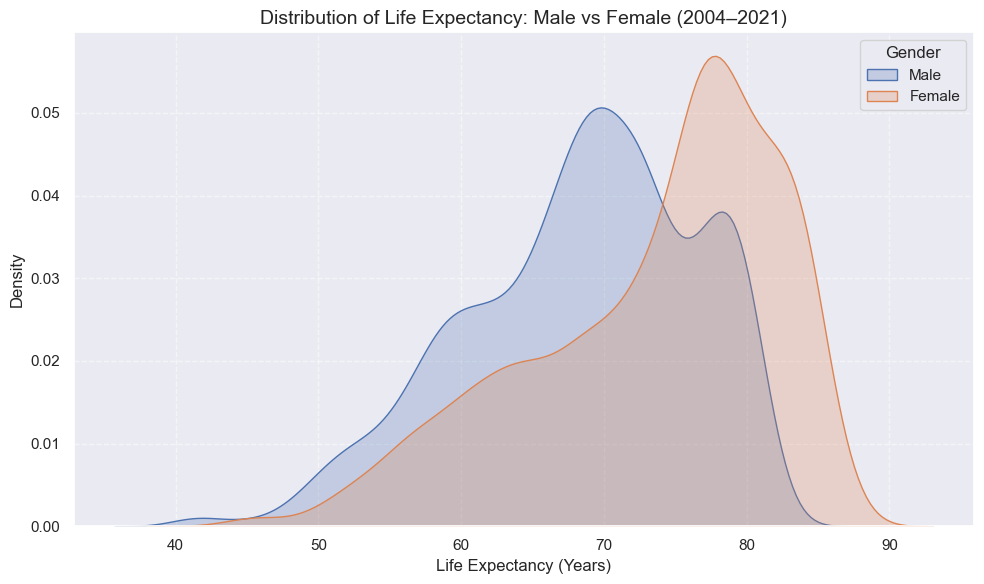

In [7]:
# Plotting KDE distribution for female vs male life expectancy
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Life expectancy at birth, male (years)'], label='Male', fill=True)
sns.kdeplot(df['Life expectancy at birth, female (years)'], label='Female', fill=True)

plt.title("Distribution of Life Expectancy: Male vs Female (2004–2021)", fontsize=14)
plt.xlabel("Life Expectancy (Years)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Gender")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Global Average Life Expectancy at Birth Over Time (Male, Female, Total)

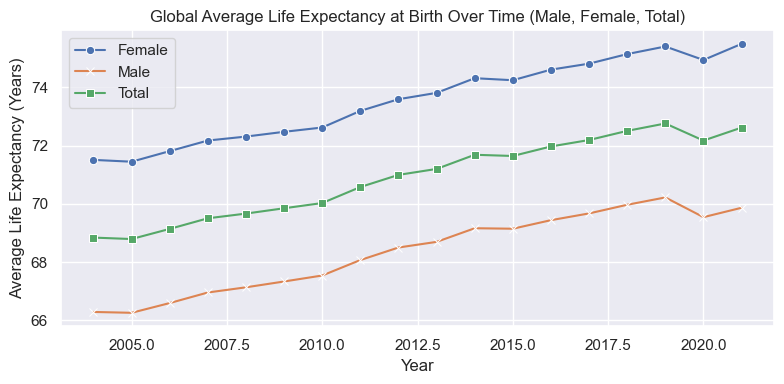

In [8]:
yearly_life_expectancy = df.groupby("Year")[[
    "Life expectancy at birth, female (years)",
    "Life expectancy at birth, male (years)",
    "Life expectancy at birth, total (years)"
]].mean().reset_index()

# Plotting the trends
plt.figure(figsize=(8,4))
sns.lineplot(data=yearly_life_expectancy, x="Year", y="Life expectancy at birth, female (years)", marker="o", label="Female")
sns.lineplot(data=yearly_life_expectancy, x="Year", y="Life expectancy at birth, male (years)", marker="x", label="Male")
sns.lineplot(data=yearly_life_expectancy, x="Year", y="Life expectancy at birth, total (years)", marker="s", label="Total")

plt.title("Global Average Life Expectancy at Birth Over Time (Male, Female, Total)")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy (Years)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Life Expectancy Trends and Distribution by Region 

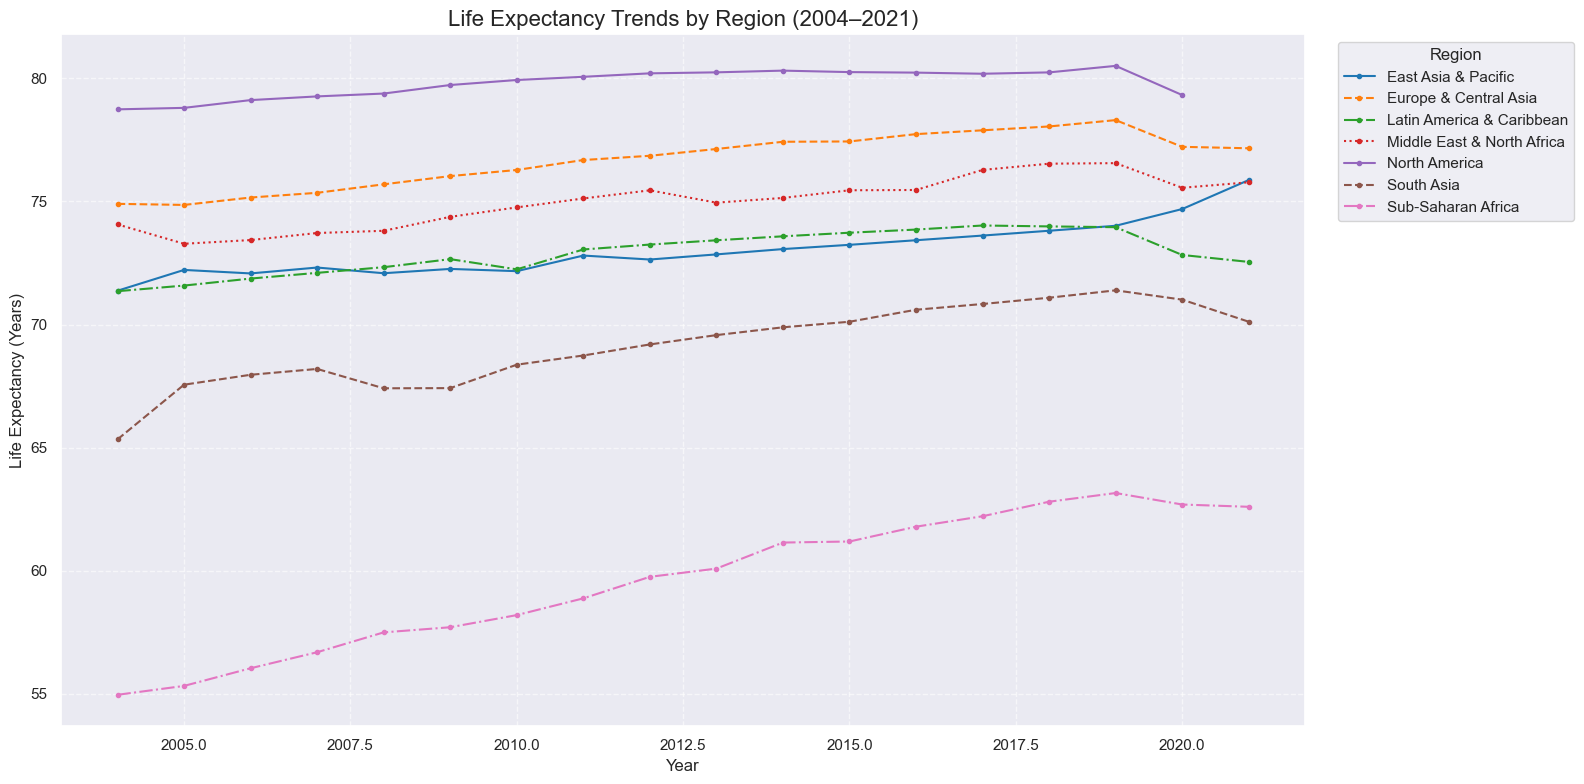

In [9]:
# Step 1: Identify and melt region columns
region_columns = [col for col in df.columns if col.startswith("Region_")]

df_regions = df.copy()
df_regions = df_regions.melt(id_vars=['Year', 'Life expectancy at birth, total (years)'],
                             value_vars=region_columns,
                             var_name='Region', value_name='is_region')

# Step 2: Filter rows where region is active
df_regions = df_regions[df_regions['is_region'] == 1]

# Step 3: Clean region names
df_regions['Region'] = df_regions['Region'].str.replace('Region_', '')

# Step 4: Remove income-based regions
income_regions = ['High income', 'Low income', 'Upper middle income', 'Lower middle income']
df_regions = df_regions[~df_regions['Region'].isin(income_regions)]

# Step 5: Group data
region_life_expectancy = df_regions.groupby(['Year', 'Region'])[
    'Life expectancy at birth, total (years)'
].mean().reset_index()

# Step 6: Plotting
region_order = sorted(region_life_expectancy['Region'].unique())
palette = sns.color_palette("tab10") + sns.color_palette("Set2")
linestyles = ['-', '--', '-.', ':'] * 4

plt.figure(figsize=(16, 8))
for i, region in enumerate(region_order):
    region_data = region_life_expectancy[region_life_expectancy['Region'] == region]
    plt.plot(region_data['Year'],
             region_data['Life expectancy at birth, total (years)'],
             label=region,
             linestyle=linestyles[i % len(linestyles)],
             color=palette[i % len(palette)],
             marker='o', markersize=3)

# Step 7: Final touches
plt.title("Life Expectancy Trends by Region (2004–2021)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Region", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

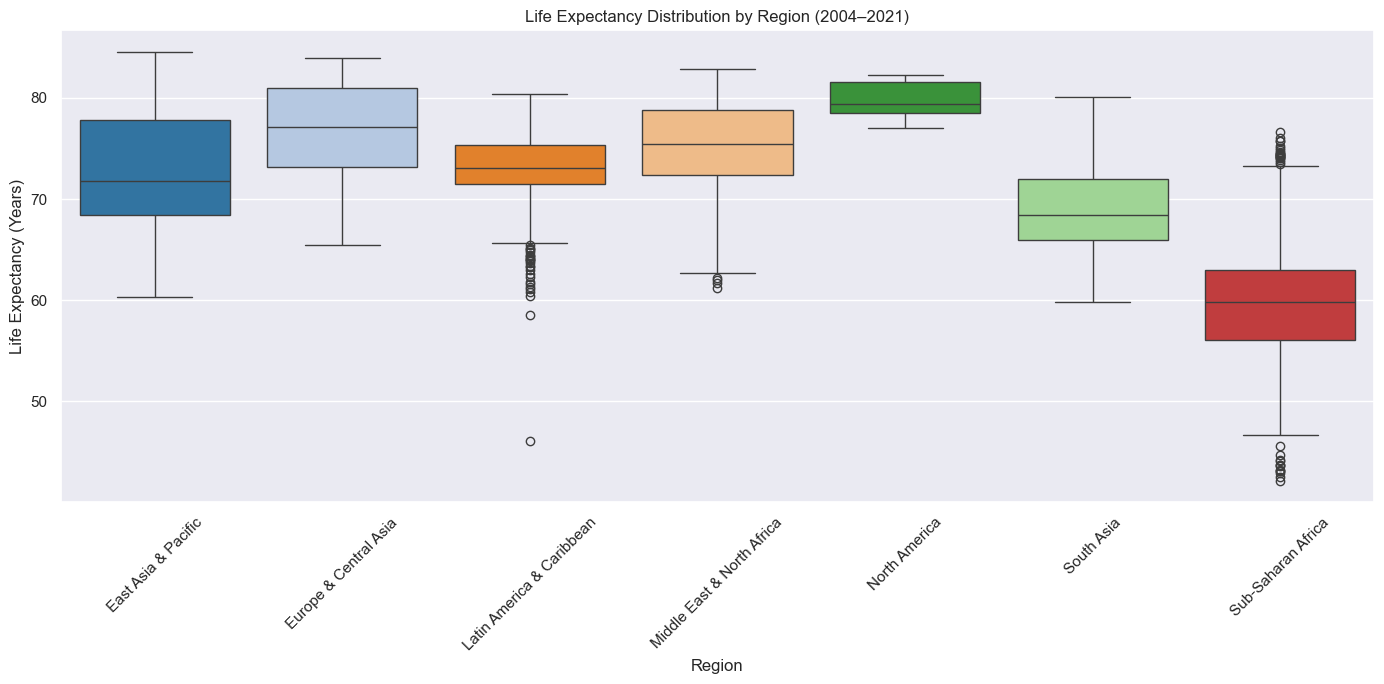

In [10]:
# Reuse the earlier melted region data
df_regions_box = df.copy()
region_columns = [col for col in df.columns if col.startswith("Region_")]

df_regions_box = df_regions_box.melt(
    id_vars=['Year', 'Life expectancy at birth, total (years)'],
    value_vars=region_columns,
    var_name='Region',
    value_name='is_region'
)

# Filter only active region rows
df_regions_box = df_regions_box[df_regions_box['is_region'] == 1]
df_regions_box['Region'] = df_regions_box['Region'].str.replace('Region_', '')

# Step 4: Remove income-based regions
income_regions = ['High income', 'Low income', 'Upper middle income', 'Lower middle income']
df_regions_box = df_regions_box[~df_regions_box['Region'].isin(income_regions)]

# Plotting boxplots for life expectancy by region
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_regions_box, x='Region', y='Life expectancy at birth, total (years)', palette='tab20',hue='Region')
plt.title("Life Expectancy Distribution by Region (2004–2021)")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

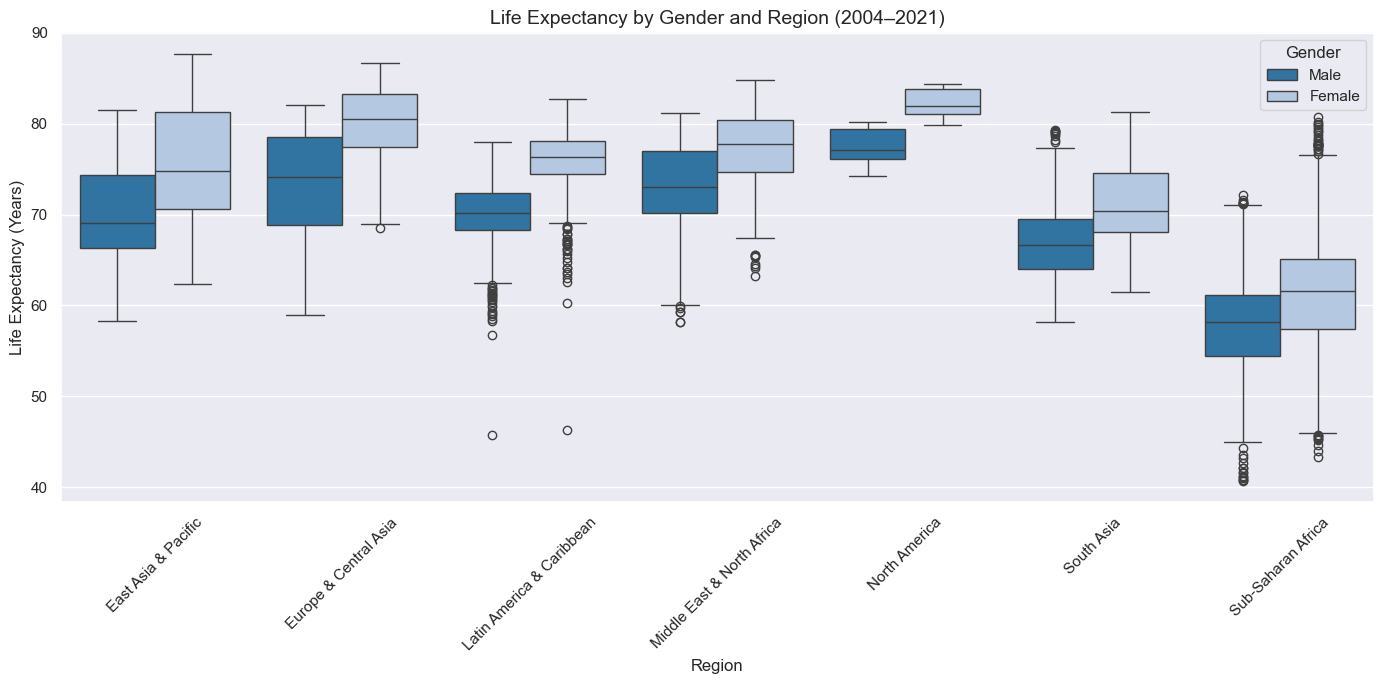

In [11]:
# Melt male and female life expectancy columns into long format
df_gender_box = pd.melt(
    df,
    id_vars=[col for col in df.columns if col.startswith('Region_')] + ['Year'],
    value_vars=['Life expectancy at birth, male (years)', 'Life expectancy at birth, female (years)'],
    var_name='Gender',
    value_name='Life Expectancy'
)

# Extract gender labels
df_gender_box['Gender'] = df_gender_box['Gender'].str.extract(r'\b(male|female)\b', expand=False).str.title()

# Melt the region columns to identify region names
df_gender_box = df_gender_box.melt(
    id_vars=['Year', 'Gender', 'Life Expectancy'],
    value_vars=[col for col in df.columns if col.startswith('Region_')],
    var_name='Region',
    value_name='is_region'
)

# Keep only active region rows
df_gender_box = df_gender_box[df_gender_box['is_region'] == 1]
df_gender_box['Region'] = df_gender_box['Region'].str.replace('Region_', '')

# Remove rows where Region is income-based
income_like_regions = ['High income', 'Low income', 'Upper middle income', 'Lower middle income']
df_gender_box = df_gender_box[~df_gender_box['Region'].isin(income_like_regions)]

# Plot side-by-side boxplots of life expectancy by region and gender
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_gender_box, x='Region', y='Life Expectancy', hue='Gender', palette='tab20')
plt.title("Life Expectancy by Gender and Region (2004–2021)", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Life Expectancy (Years)")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

#### Life Expectancy Trends by Income Group

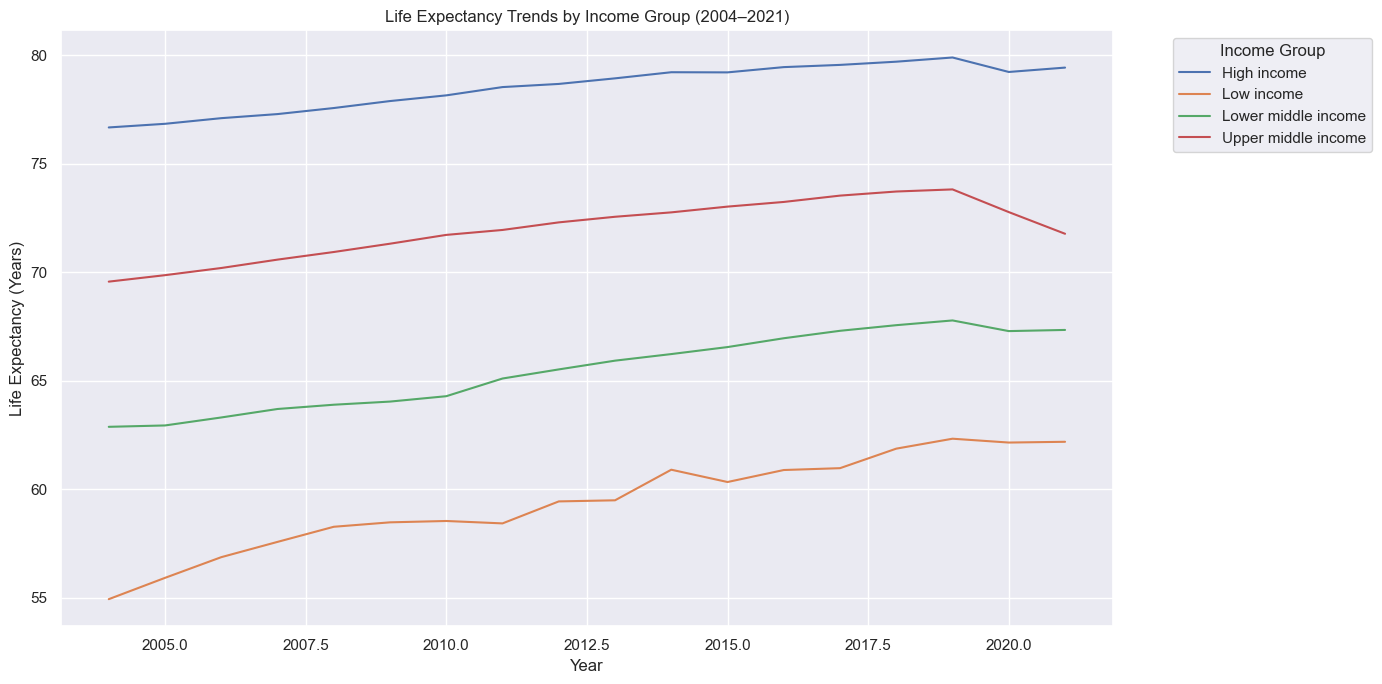

In [12]:
income_columns = [col for col in df.columns if col.startswith("Income Group_")]

# Melt the dataframe to long format to make it easier to group by income group
df_income = df.copy()
df_income = df_income.melt(id_vars=['Year', 'Life expectancy at birth, total (years)'],
                           value_vars=income_columns,
                           var_name='Income Group', value_name='is_group')

# Filter only rows where the income group is active (is_group == 1)
df_income = df_income[df_income['is_group'] == 1]

# Clean income group names
df_income['Income Group'] = df_income['Income Group'].str.replace('Income Group_', '')

# Group by Year and Income Group to get mean life expectancy
income_life_expectancy = df_income.groupby(['Year', 'Income Group'])[
    'Life expectancy at birth, total (years)'
].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=income_life_expectancy, x='Year', y='Life expectancy at birth, total (years)', hue='Income Group')
plt.title("Life Expectancy Trends by Income Group (2004–2021)")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Year")
plt.legend(title="Income Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Melt male and female life expectancy columns into long format
df_income_gender_box = pd.melt(
    df,
    id_vars=[col for col in df.columns if col.startswith('Income Group_')] + ['Year'],
    value_vars=['Life expectancy at birth, male (years)', 'Life expectancy at birth, female (years)'],
    var_name='Gender',
    value_name='Life Expectancy'
)

# Extract gender labels
df_income_gender_box['Gender'] = df_income_gender_box['Gender'].str.extract(r'\b(male|female)\b', expand=False).str.title()

# Melt the income group columns to long format
df_income_gender_box = df_income_gender_box.melt(
    id_vars=['Year', 'Gender', 'Life Expectancy'],
    value_vars=[col for col in df.columnbbs if col.startswith('Income Group_')],
    var_name='Income Group',
    value_name='is_group'
)

# Filter only active income group rows
df_income_gender_box = df_income_gender_box[df_income_gender_box['is_group'] == 1]
df_income_gender_box['Income Group'] = df_income_gender_box['Income Group'].str.replace('Income Group_', '')

# Plot side-by-side boxplots of life expectancy by income group and gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_income_gender_box, x='Income Group', y='Life Expectancy', hue='Gender', palette='tab20')
plt.title("Life Expectancy by Gender and Income Group (2004–2021)", fontsize=14)
plt.xlabel("Income Group")
plt.ylabel("Life Expectancy (Years)")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

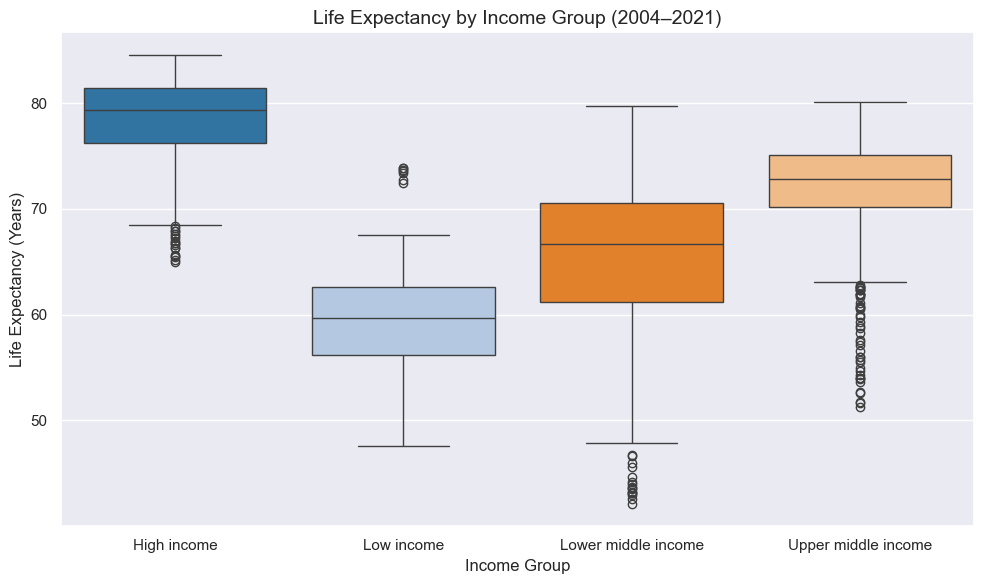

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Use only the total life expectancy column and income group columns
df_income_box = df[['Year', 'Life expectancy at birth, total (years)'] + 
                   [col for col in df.columns if col.startswith('Income Group_')]]

# Step 2: Melt income group columns into long format
df_income_box = df_income_box.melt(
    id_vars=['Year', 'Life expectancy at birth, total (years)'],
    value_vars=[col for col in df.columns if col.startswith('Income Group_')],
    var_name='Income Group',
    value_name='is_group'
)

# Step 3: Filter only rows where the group is active
df_income_box = df_income_box[df_income_box['is_group'] == 1]

# Step 4: Clean the income group labels
df_income_box['Income Group'] = df_income_box['Income Group'].str.replace('Income Group_', '')

# Step 5: Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_income_box,
            x='Income Group',
            y='Life expectancy at birth, total (years)',
            palette='tab20', hue= "Income Group")
plt.title("Life Expectancy by Income Group (2004–2021)", fontsize=14)
plt.xlabel("Income Group")
plt.ylabel("Life Expectancy (Years)")
plt.tight_layout()
plt.show()

#### Change in Life Expectancy
Calculate and plot yearly change (delta) in life expectancy to spot jumps or declines.

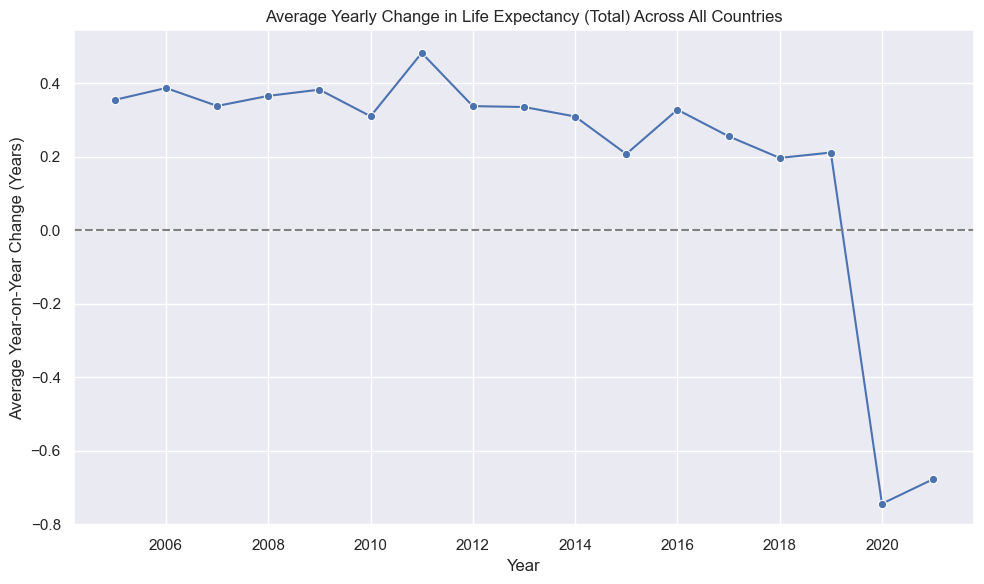

In [14]:
# Sort the dataframe by Country and Year for proper difference calculation
df_sorted = df.sort_values(by=['CountryShortName', 'Year'])

# Calculate yearly delta in life expectancy (total) by country
df_sorted['Life Expectancy Change'] = df_sorted.groupby('CountryShortName')[
    'Life expectancy at birth, total (years)'
].diff()

# Group by year and calculate average change across all countries
yearly_change = df_sorted.groupby('Year')['Life Expectancy Change'].mean().reset_index()

# Plotting the average yearly change
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_change, x='Year', y='Life Expectancy Change', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Average Yearly Change in Life Expectancy (Total) Across All Countries")
plt.ylabel("Average Year-on-Year Change (Years)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [15]:
# Recalculate the income_yearly_change
df_income_change = df.copy()
df_income_change = df_income_change.melt(
    id_vars=['CountryShortName', 'Year', 'Life expectancy at birth, total (years)'],
    value_vars=income_columns,
    var_name='Income Group',
    value_name='is_group'
)

df_income_change = df_income_change[df_income_change['is_group'] == 1]
df_income_change['Life Expectancy Change'] = df_income_change.groupby('CountryShortName')[
    'Life expectancy at birth, total (years)'
].diff()

# Group by year and income group to get average yearly change
income_yearly_change = df_income_change.groupby(['Year', 'Income Group'])[
    'Life Expectancy Change'
].mean().reset_index()

#### Yearly Change in Life Expectancy by Income Group (2004–2021)

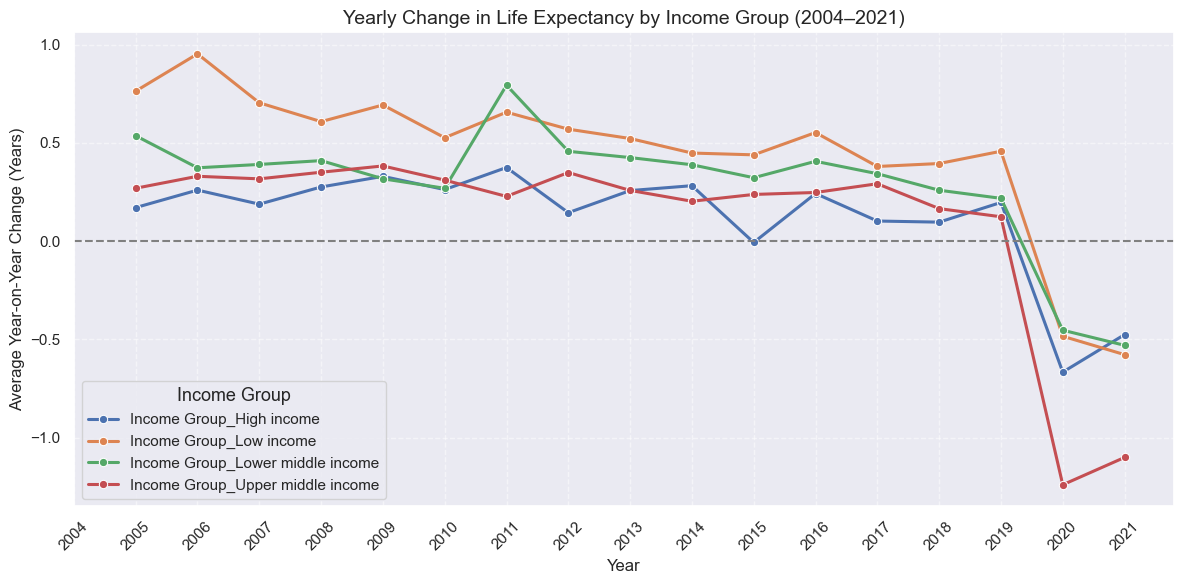

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=income_yearly_change,
    x='Year',
    y='Life Expectancy Change',
    hue='Income Group',
    marker='o',
    linewidth=2.2
)

# Add horizontal line for reference
plt.axhline(0, color='gray', linestyle='--')


plt.title("Yearly Change in Life Expectancy by Income Group (2004–2021)", fontsize=14)
plt.ylabel("Average Year-on-Year Change (Years)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(income_yearly_change['Year'].unique(), rotation=45)
plt.legend(title="Income Group", title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Yearly Change in Life Expectancy by Region (2004–2021)

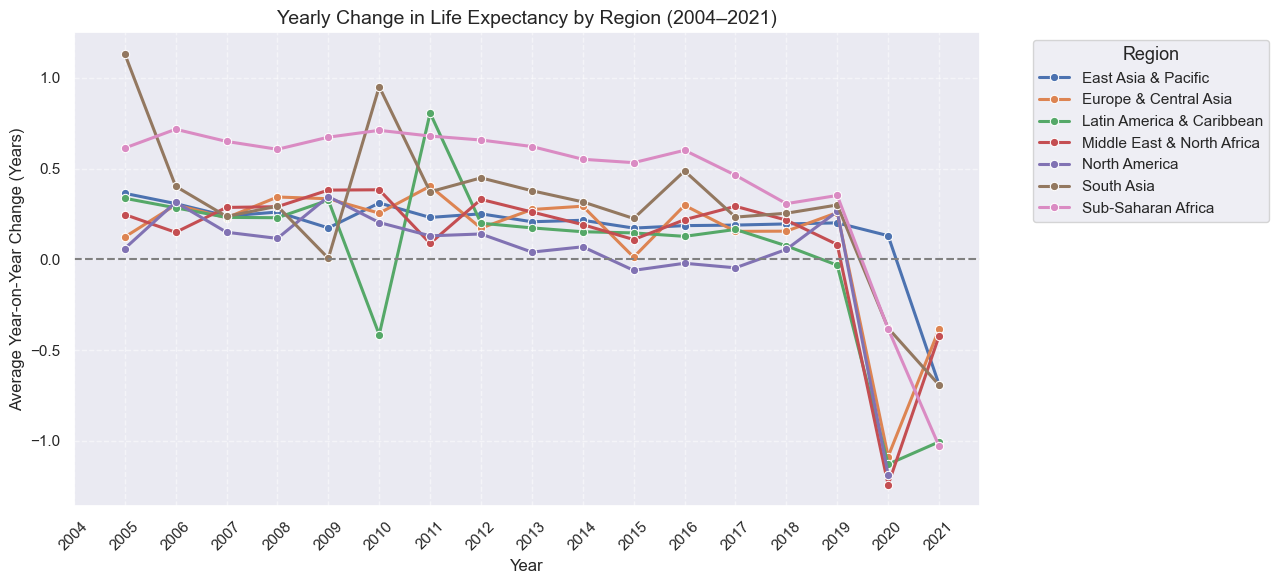

In [17]:
# Identify region columns
region_columns = [col for col in df.columns if col.startswith("Region_")]

# Melt data for region-wise analysis
df_region_change = df.copy()
df_region_change = df_region_change.melt(
    id_vars=['CountryShortName', 'Year', 'Life expectancy at birth, total (years)'],
    value_vars=region_columns,
    var_name='Region',
    value_name='is_region'
)

# Filter only active region rows
df_region_change = df_region_change[df_region_change['is_region'] == 1]
df_region_change['Region'] = df_region_change['Region'].str.replace('Region_', '')

# Exclude income-based region categories
income_like_regions = ['High income', 'Low income', 'Upper middle income', 'Lower middle income']
df_region_change = df_region_change[~df_region_change['Region'].isin(income_like_regions)]

# Sort and compute life expectancy change by country
df_region_change = df_region_change.sort_values(by=['CountryShortName', 'Year'])
df_region_change['Life Expectancy Change'] = df_region_change.groupby('CountryShortName')[
    'Life expectancy at birth, total (years)'
].diff()

# Group by year and region to compute average change
region_yearly_change = df_region_change.groupby(['Year', 'Region'])[
    'Life Expectancy Change'
].mean().reset_index()

# Plotting the smoothed region-wise line plot
plt.figure(figsize=(13, 6))
sns.lineplot(
    data=region_yearly_change,
    x='Year',
    y='Life Expectancy Change',
    hue='Region',
    marker='o',
    linewidth=2.2
)

# Reference line at zero
plt.axhline(0, color='gray', linestyle='--')


plt.title("Yearly Change in Life Expectancy by Region (2004–2021)", fontsize=14)
plt.ylabel("Average Year-on-Year Change (Years)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(region_yearly_change['Year'].unique(), rotation=45)
plt.legend(title="Region", title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [18]:
# Create a Gender Gap column: Female - Male life expectancy
df['Gender Gap (Female - Male)'] = df['Life expectancy at birth, female (years)'] - df['Life expectancy at birth, male (years)']

# Display basic statistics for the gender gap
gender_gap_stats = df['Gender Gap (Female - Male)'].describe()

gender_gap_stats

count    2886.000000
mean        5.182380
std         2.125714
min         0.071000
25%         3.762500
50%         4.840000
75%         6.333500
max        13.550000
Name: Gender Gap (Female - Male), dtype: float64

Mean gap: ~5.18 years

Median (50th percentile): ~4.84 years

75th percentile: over 6.3 years

Max gap: 13.55 years — that's a huge disparity in some countries

Min gap: ~0.07 years — very close life expectancy between genders

In [19]:
import plotly.express as px
import pandas as pd

# Calculate average gender gap per country
avg_gender_gap_country = df.groupby('CountryShortName')['Gender Gap (Female - Male)'].mean().reset_index()
avg_gender_gap_country.columns = ['Country', 'Average Gender Gap']

# Create choropleth map
fig = px.choropleth(
    avg_gender_gap_country,
    locations='Country',
    locationmode='country names',
    color='Average Gender Gap',
    color_continuous_scale='rdbu',
    title='Average Gender Gap in Life Expectancy (Female - Male, 2004–2021)',
    labels={'Average Gender Gap': 'Years'}
)

fig.update_geos(showframe=False, showcoastlines=True)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

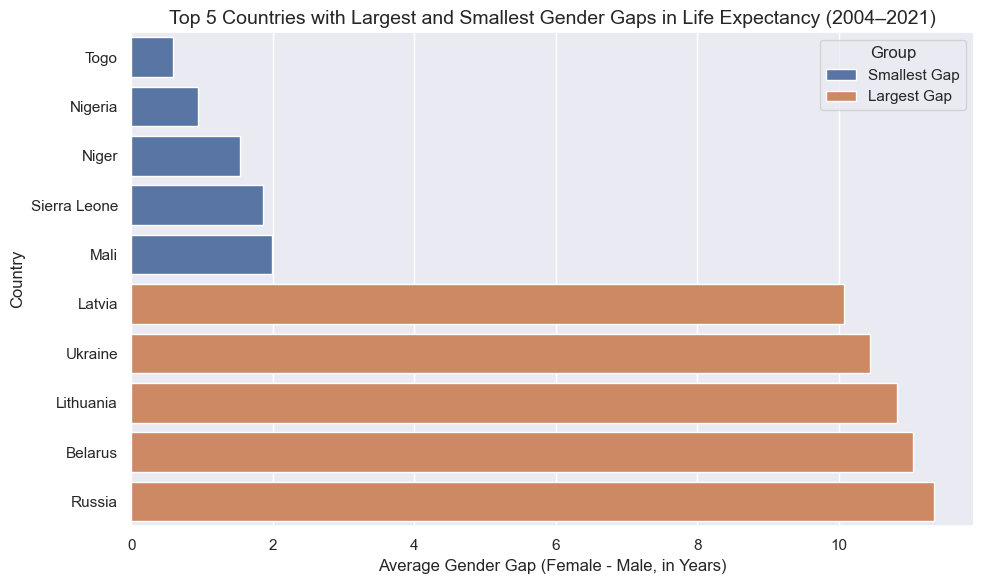

In [20]:
# Calculate average gender gap per country
avg_gender_gap_country = df.groupby('CountryShortName')['Gender Gap (Female - Male)'].mean().sort_values()

# Get bottom 5 and top 5 countries
bottom_5_gap = avg_gender_gap_country.head(5)
top_5_gap = avg_gender_gap_country.tail(5)

# Combine for plotting
gap_bar_df = pd.concat([bottom_5_gap, top_5_gap]).reset_index()
gap_bar_df.columns = ['Country', 'Average Gender Gap']
gap_bar_df['Group'] = ['Smallest Gap'] * 5 + ['Largest Gap'] * 5

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=gap_bar_df, x='Average Gender Gap', y='Country', hue='Group', dodge=False)
plt.title("Top 5 Countries with Largest and Smallest Gender Gaps in Life Expectancy (2004–2021)", fontsize=14)
plt.xlabel("Average Gender Gap (Female - Male, in Years)", fontsize=12)
plt.ylabel("Country")
plt.legend(title="Group")
plt.tight_layout()
plt.show()

#### Plot standard deviation of life expectancy within each year to see if global inequality is rising/falling.

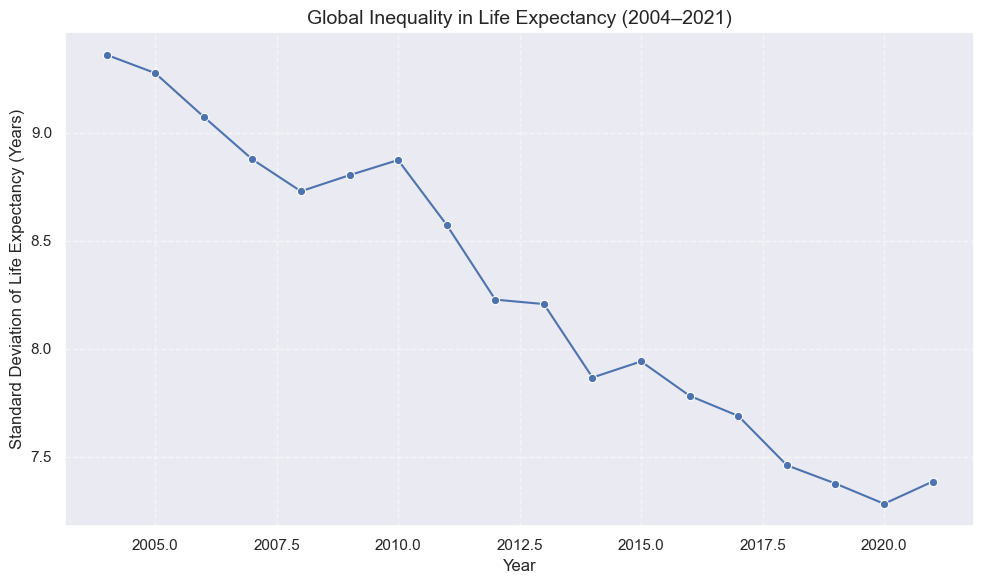

In [21]:
# Calculate standard deviation of life expectancy within each year to assess global inequality
yearly_inequality = df.groupby('Year')['Life expectancy at birth, total (years)'].std().reset_index()

# Plot the standard deviation (inequality) of life expectancy over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_inequality, x='Year', y='Life expectancy at birth, total (years)', marker='o')
plt.title("Global Inequality in Life Expectancy (2004–2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Standard Deviation of Life Expectancy (Years)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Top 10 Countries with Significant Increase in Life Expectancy (2004–2021)

    CountryShortName  Life expectancy at birth, total (years)_2004  \
35          Ethiopia                                        53.235   
102           Uganda                                        51.547   
2             Angola                                        50.592   
97          Tanzania                                        55.596   
87            Rwanda                                        55.491   
14          Botswana                                        51.617   
58           Lesotho                                        43.711   
93         Sri Lanka                                        67.091   
74             Niger                                        52.589   
91      South Africa                                        54.043   

     Life expectancy at birth, total (years)_2021  Change in Life Expectancy  
35                                         64.975                     11.740  
102                                        62.705                     1

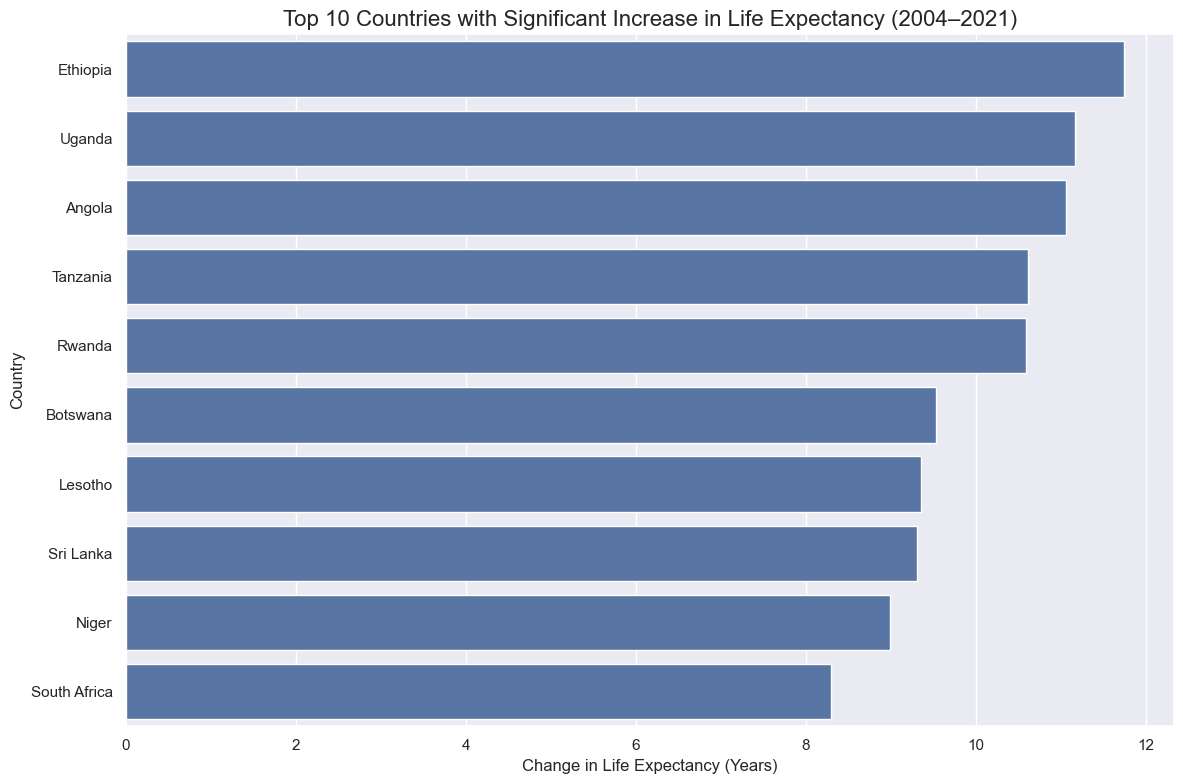

In [22]:
# Filter the data for the years 2004 and 2021
df_2004 = df[df['Year'] == 2004]
df_2021 = df[df['Year'] == 2021]

# Merge the two dataframes on 'CountryShortName'
df_merged = pd.merge(df_2004[['CountryShortName', 'Life expectancy at birth, total (years)']],
                     df_2021[['CountryShortName', 'Life expectancy at birth, total (years)']],
                     on='CountryShortName', 
                     suffixes=('_2004', '_2021'))

# Calculate the change in life expectancy from 2004 to 2021
df_merged['Change in Life Expectancy'] = df_merged['Life expectancy at birth, total (years)_2021'] - df_merged['Life expectancy at birth, total (years)_2004']

# Sort countries based on the change in life expectancy
df_merged_sorted = df_merged.sort_values(by='Change in Life Expectancy', ascending=False)

# Display the top 10 countries with their life expectancy before (2004), after (2021), and the change
top_10_countries = df_merged_sorted[['CountryShortName', 'Life expectancy at birth, total (years)_2004', 
                                     'Life expectancy at birth, total (years)_2021', 'Change in Life Expectancy']].head(10)
print(top_10_countries)

# Plot the top countries with the highest change in life expectancy
plt.figure(figsize=(12, 8))
sns.barplot(x='Change in Life Expectancy', y='CountryShortName', data=df_merged_sorted.head(10))
plt.title("Top 10 Countries with Significant Increase in Life Expectancy (2004–2021)", fontsize=16)
plt.xlabel("Change in Life Expectancy (Years)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

### Top 10 Countries with Significant Decrease in Life Expectancy (2004–2021)

           CountryShortName  Life expectancy at birth, total (years)_2004  \
65                   Mexico                                     74.372000   
77                     Oman                                     74.329000   
25               Costa Rica                                     78.331000   
16                 Bulgaria                                     72.563415   
13   Bosnia and Herzegovina                                     76.133000   
82              Philippines                                     70.037000   
100                 Tunisia                                     74.490000   
31                  Ecuador                                     74.279000   
105                 Uruguay                                     76.007000   
12                  Bolivia                                     64.004000   

     Life expectancy at birth, total (years)_2021  Change in Life Expectancy  
65                                      70.213000                     -4.

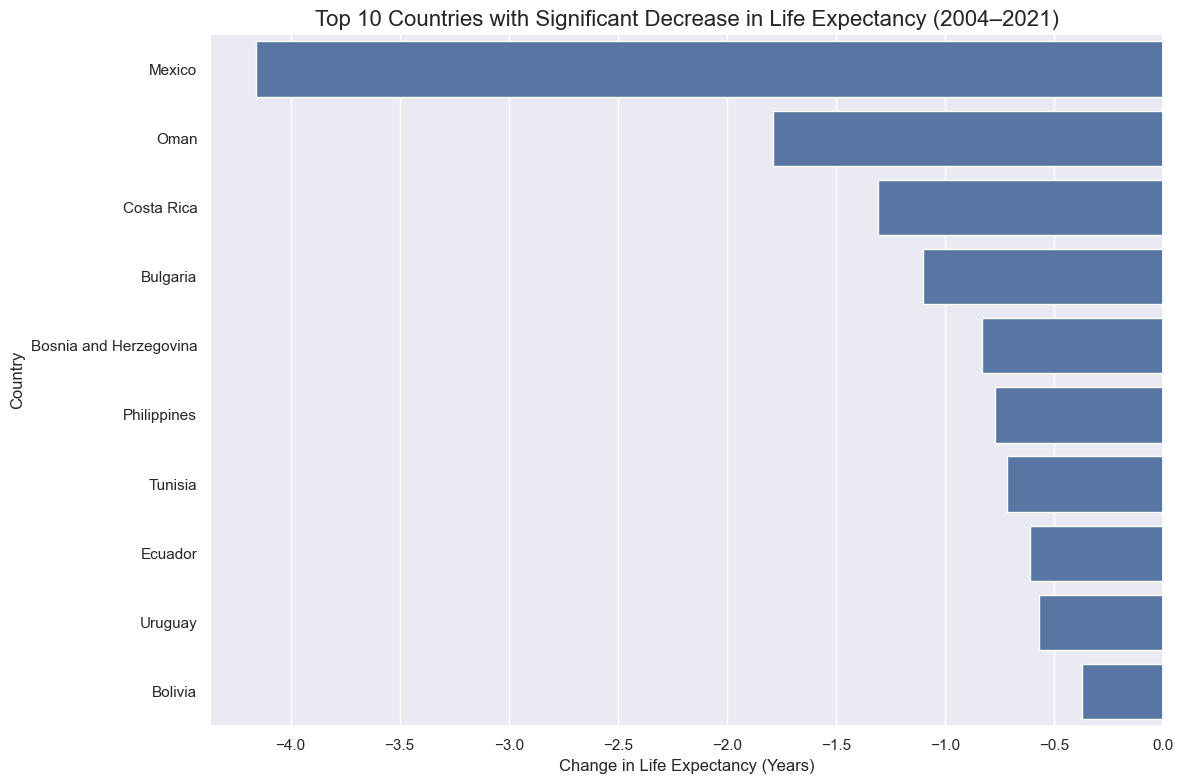

In [23]:
# Filter the data for the years 2004 and 2021
df_2004 = df[df['Year'] == 2004]
df_2021 = df[df['Year'] == 2021]

# Merge the two dataframes on 'CountryShortName'
df_merged = pd.merge(df_2004[['CountryShortName', 'Life expectancy at birth, total (years)']],
                     df_2021[['CountryShortName', 'Life expectancy at birth, total (years)']],
                     on='CountryShortName', 
                     suffixes=('_2004', '_2021'))

# Calculate the change in life expectancy from 2004 to 2021
df_merged['Change in Life Expectancy'] = df_merged['Life expectancy at birth, total (years)_2021'] - df_merged['Life expectancy at birth, total (years)_2004']

# Sort countries based on the change in life expectancy
df_merged_sorted = df_merged.sort_values(by='Change in Life Expectancy', ascending=True)

# Display the top 10 countries with their life expectancy before (2004), after (2021), and the change
top_10_countries = df_merged_sorted[['CountryShortName', 'Life expectancy at birth, total (years)_2004', 
                                     'Life expectancy at birth, total (years)_2021', 'Change in Life Expectancy']].head(10)
print(top_10_countries)

# Plot the top countries with the highest change in life expectancy
plt.figure(figsize=(12, 8))
sns.barplot(x='Change in Life Expectancy', y='CountryShortName', data=df_merged_sorted.head(10))
plt.title("Top 10 Countries with Significant Decrease in Life Expectancy (2004–2021)", fontsize=16)
plt.xlabel("Change in Life Expectancy (Years)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

# Correlation Analysis

In [24]:
# Select only numeric columns for correlation analysis
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for all numeric variables
correlation_matrix = df_numeric.corr()

# Extract the correlation with life expectancy (assuming the column name for life expectancy is 'Life expectancy at birth, total (years)')
correlation_with_life_exp = correlation_matrix['Life expectancy at birth, total (years)'].sort_values(ascending=False)

# Display the most correlated variables with life expectancy
print(correlation_with_life_exp)

Life expectancy at birth, total (years)                                           1.000000
Life expectancy at birth, female (years)                                          0.993170
Life expectancy at birth, male (years)                                            0.992245
People using at least basic sanitation services (% of population)                 0.855221
People using at least basic sanitation services, urban (% of urban population)    0.838705
                                                                                    ...   
Mortality rate, infant, female (per 1,000 live births)                           -0.914373
Mortality rate, adult, male (per 1,000 male adults)                              -0.916815
Mortality rate, infant (per 1,000 live births)                                   -0.918036
Mortality rate, infant, male (per 1,000 live births)                             -0.920132
Mortality rate, adult, female (per 1,000 female adults)                          -0.951193

In [25]:
file_path = r"C:\Users\Namrata Patil\Desktop\bana698proj\culminating-project-group-1\Week 6\Final Predictor List.xlsx"
indicators_df = pd.read_excel(file_path, sheet_name='Sheet1')
indicators_df.keys()

Index(['idx', 'Field Name', 'Category'], dtype='object')

In [26]:
# Filter the categories to extract health, socioeconomic, and environmental variables
health_indicators = indicators_df[indicators_df['Category'] == 'Health']['Field Name'].tolist()
socio_indicators = indicators_df[indicators_df['Category'] == 'Socio']['Field Name'].tolist()
environmental_indicators = indicators_df[indicators_df['Category'] == 'Environmental']['Field Name'].tolist()

# Display the extracted lists of indicators
health_indicators, socio_indicators, environmental_indicators

(['People practicing open defecation (% of population)',
  'Prevalence of undernourishment (% of population)',
  'Prevalence of overweight (modeled estimate, % of children under 5)',
  'Domestic private health expenditure per capita (current US$)',
  'Population ages 0-14, total',
  'Number of maternal deaths',
  'Incidence of tuberculosis (per 100,000 people)',
  'Lifetime risk of maternal death (%)',
  'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
  'Lifetime risk of maternal death (1 in: rate varies by country)'],
 ['Transport services (% of commercial service exports)',
  'Refugee population by country or territory of asylum',
  'External balance on goods and services (% of GDP)',
  'Claims on central government, etc. (% GDP)',
  'Commercial bank branches (per 100,000 adults)',
  'Adjusted savings: energy depletion (% of GNI)',
  'Insurance and financial services (% of commercial service exports)',
  'Region_South Asia',
  '

In [27]:
# Select the relevant columns (life expectancy and the indicators from each category)
selected_columns = ['Life expectancy at birth, total (years)'] + health_indicators + socio_indicators + environmental_indicators

# Subset the dataframe to include only the selected columns
df_selected = df[selected_columns]

# Compute the correlation matrix for these columns
correlation_matrix_selected = df_selected.corr()

# Extract the correlation with life expectancy
correlation_with_life_exp_selected = correlation_matrix_selected['Life expectancy at birth, total (years)'].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_life_exp_selected)

Life expectancy at birth, total (years)                                                                 1.000000
Domestic private health expenditure per capita (current US$)                                            0.605146
Lifetime risk of maternal death (1 in: rate varies by country)                                          0.599265
Commercial bank branches (per 100,000 adults)                                                           0.559782
Agriculture, forestry, and fishing, value added per worker (constant 2015 US$)                          0.556768
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)                              0.540830
Fertilizer consumption (kilograms per hectare of arable land)                                           0.447929
Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)        0.354504
External balance on goods and services (% of GDP)                                               

In [28]:
# Filter correlation values to only include Health indicators
health_corr = correlation_with_life_exp_selected[correlation_with_life_exp_selected.index.isin(health_indicators)]

# Sort in descending order of correlation values 
health_corr_sorted = health_corr.sort_values(ascending=False)

# Display sorted results
print(health_corr_sorted)

Domestic private health expenditure per capita (current US$)                                            0.605146
Lifetime risk of maternal death (1 in: rate varies by country)                                          0.599265
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0.327952
Prevalence of overweight (modeled estimate, % of children under 5)                                      0.291610
Population ages 0-14, total                                                                            -0.110631
Number of maternal deaths                                                                              -0.394642
People practicing open defecation (% of population)                                                    -0.626624
Prevalence of undernourishment (% of population)                                                       -0.681472
Incidence of tuberculosis (per 100,000 people)                                                  

In [29]:
# Filter for socioeconomic indicators
socio_corr = correlation_with_life_exp_selected[correlation_with_life_exp_selected.index.isin(socio_indicators)]

# Sort in descending order
socio_corr_sorted = socio_corr.sort_values(ascending=False)

# Display results
print(socio_corr_sorted)

Commercial bank branches (per 100,000 adults)                                           0.559782
Agriculture, forestry, and fishing, value added per worker (constant 2015 US$)          0.556768
External balance on goods and services (% of GDP)                                       0.347827
International tourism, number of arrivals                                               0.346710
Ores and metals imports (% of merchandise imports)                                      0.322415
Claims on central government, etc. (% GDP)                                              0.209234
Region_Middle East & North Africa                                                       0.168486
Insurance and financial services (% of commercial service exports)                      0.143165
Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)    0.108599
Region_Latin America & Caribbean                                                        0.107858
Travel services (% of commerci

In [30]:
# Clean environmental indicator names for matching
environmental_indicators_cleaned = [col.strip() for col in environmental_indicators]
corr_index_cleaned = correlation_with_life_exp_selected.index.str.strip()

# Apply cleaned index
corr_with_cleaned_index = correlation_with_life_exp_selected.copy()
corr_with_cleaned_index.index = corr_index_cleaned

# Filter and sort
env_corr = corr_with_cleaned_index[corr_with_cleaned_index.index.isin(environmental_indicators_cleaned)]
env_corr_sorted = env_corr.sort_values(ascending=False)

# Display
print(env_corr_sorted)

Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)                          0.540830
Fertilizer consumption (kilograms per hectare of arable land)                                       0.447929
Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)    0.354504
Population density (people per sq. km of land area)                                                 0.213698
Capture fisheries production (metric tons)                                                          0.147418
Aquaculture production (metric tons)                                                                0.064357
Renewable internal freshwater resources per capita (cubic meters)                                   0.063682
Natural gas rents (% of GDP)                                                                        0.049484
Forest area (% of land area)                                                                        0.007758
GOAL 13: Climate Ac

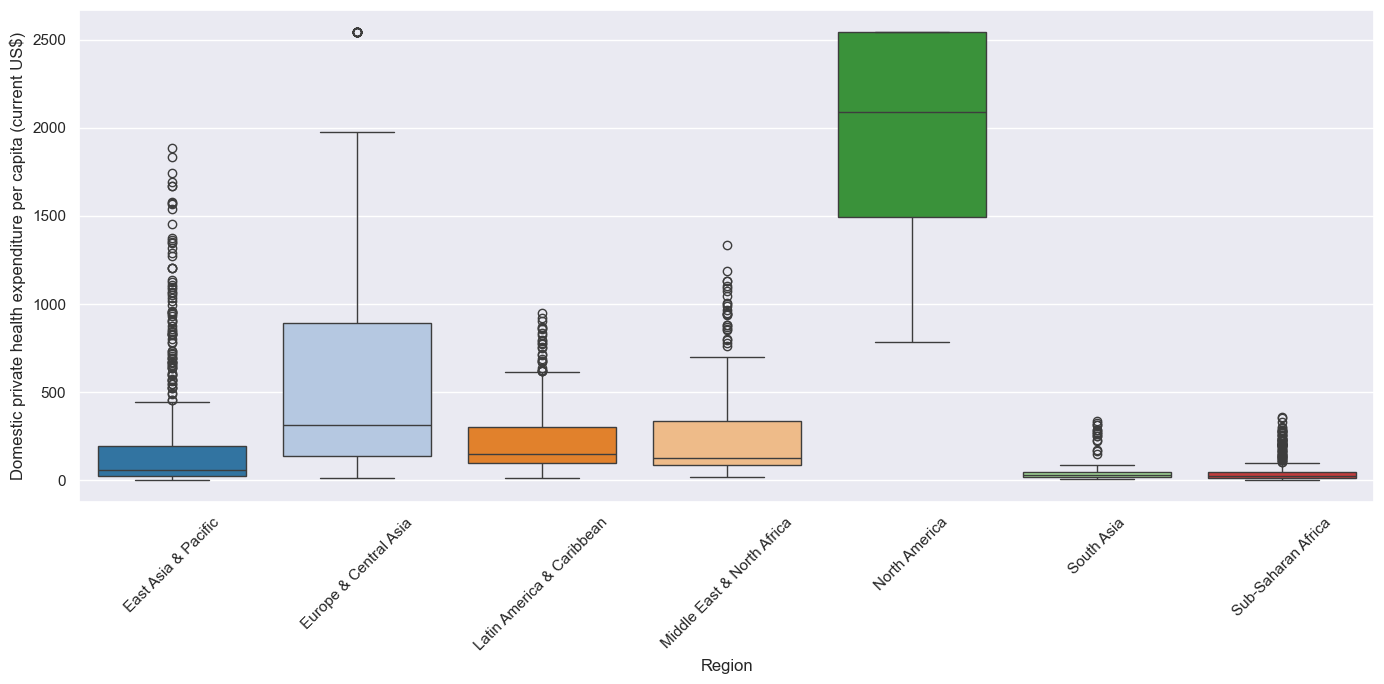

In [31]:
# Reuse the earlier melted region data
df_regions_box = df.copy()
region_columns = [col for col in df.columns if col.startswith("Region_")]

df_regions_box = df_regions_box.melt(
    id_vars=['Year', 'Domestic private health expenditure per capita (current US$)'],
    value_vars=region_columns,
    var_name='Region',
    value_name='is_region'
)

# Filter only active region rows
df_regions_box = df_regions_box[df_regions_box['is_region'] == 1]
df_regions_box['Region'] = df_regions_box['Region'].str.replace('Region_', '')

# Step 4: Remove income-based regions
income_regions = ['High income', 'Low income', 'Upper middle income', 'Lower middle income']
df_regions_box = df_regions_box[~df_regions_box['Region'].isin(income_regions)]

# Plotting boxplots for life expectancy by region
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_regions_box, x='Region', y='Domestic private health expenditure per capita (current US$)', palette='tab20',hue='Region')
#plt.title("Domestic private health expenditure per capita (current US$)")
plt.ylabel("Domestic private health expenditure per capita (current US$)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
df['Domestic private health expenditure per capita (current US$)']

0       30.138657
1       31.484863
2       36.796546
3       38.358640
4       39.189833
          ...    
2881    34.812848
2882    41.370589
2883    13.044235
2884    11.267073
2885    13.948307
Name: Domestic private health expenditure per capita (current US$), Length: 2886, dtype: float64

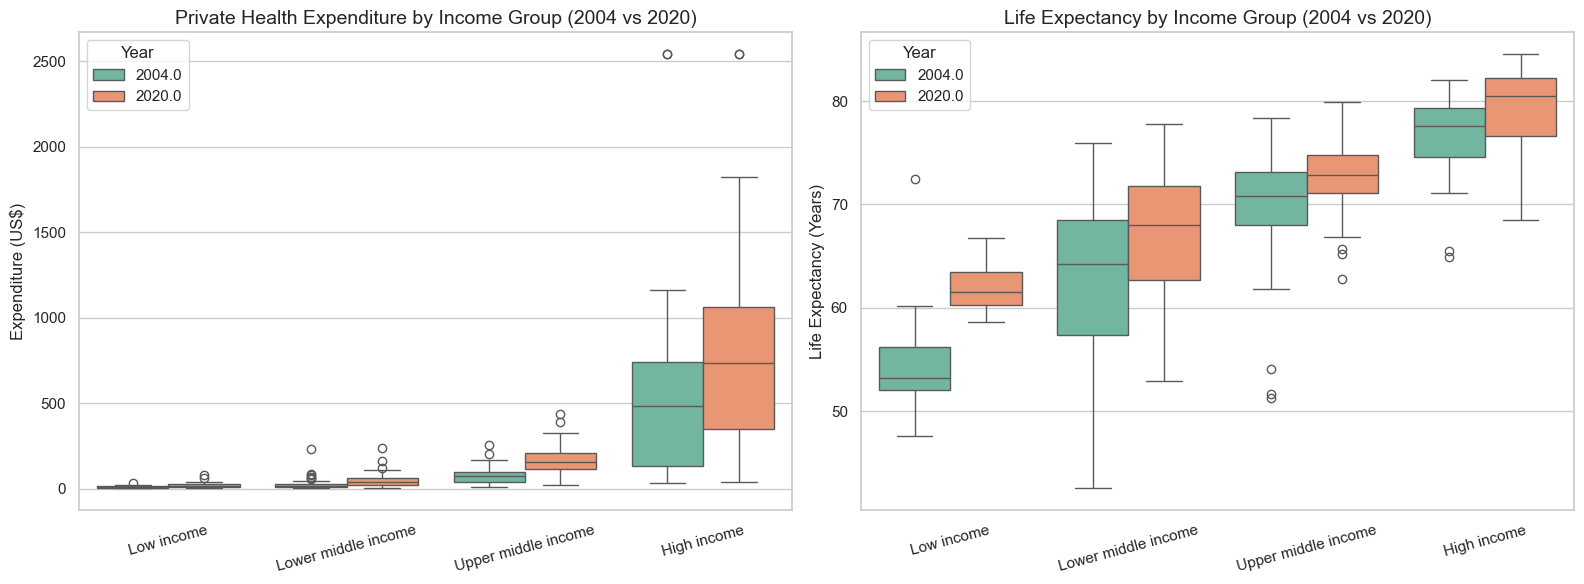

In [33]:
# Filter for years 2004 and 2020
df_box = df[df['Year'].isin([2004, 2020])].copy()

# Get the income group from dummy columns
income_cols = [col for col in df.columns if col.startswith("Income Group_")]
df_box["Income Group"] = df_box[income_cols].idxmax(axis=1).str.replace("Income Group_", "")

# Set plot style
sns.set(style="whitegrid")

# Define custom order for Income Groups
income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

# Create subplots
plt.figure(figsize=(16, 6))

# Plot 1: Boxplot of Domestic Private Health Expenditure
plt.subplot(1, 2, 1)
sns.boxplot(data=df_box,
            x='Income Group',
            y='Domestic private health expenditure per capita (current US$)',
            hue='Year',
            palette='Set2', 
            order=income_order)
plt.title("Private Health Expenditure by Income Group (2004 vs 2020)", fontsize=14)
plt.xticks(rotation=15)
plt.xlabel("")
plt.ylabel("Expenditure (US$)")

# Plot 2: Boxplot of Life Expectancy
plt.subplot(1, 2, 2)
sns.boxplot(data=df_box,
            x='Income Group',
            y='Life expectancy at birth, total (years)',
            hue='Year',
            palette='Set2', 
            order=income_order)
plt.title("Life Expectancy by Income Group (2004 vs 2020)", fontsize=14)
plt.xticks(rotation=15)
plt.xlabel("")
plt.ylabel("Life Expectancy (Years)")

plt.tight_layout()
plt.show()

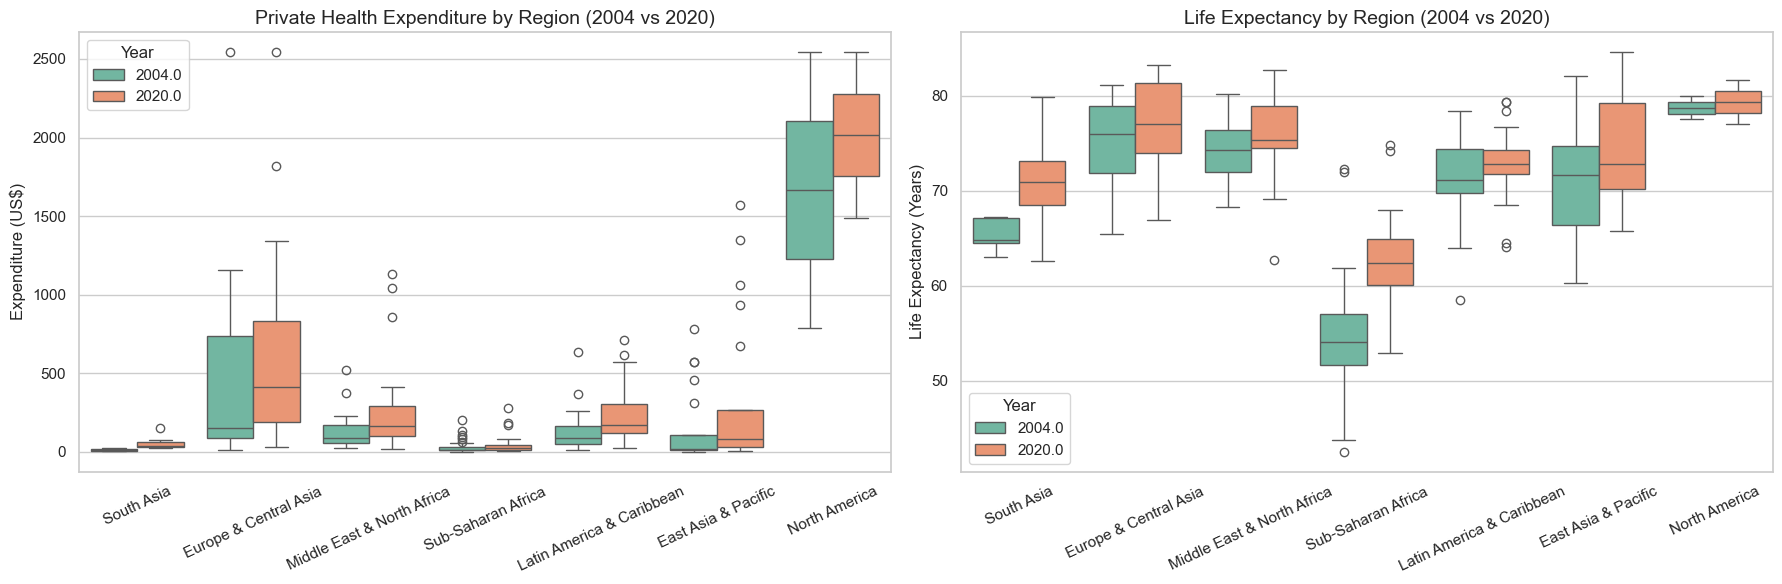

In [61]:
# Filter for years 2004 and 2021
df_region = df[df['Year'].isin([2004, 2020])].copy()

# Extract region from dummy columns
region_cols = [col for col in df.columns if col.startswith("Region_")]
df_region["Region"] = df_region[region_cols].idxmax(axis=1).str.replace("Region_", "")

# Set style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(18, 6))

# Plot 1: Private Health Expenditure per Capita by Region
plt.subplot(1, 2, 1)
sns.boxplot(data=df_region,
            x='Region',
            y='Domestic private health expenditure per capita (current US$)',
            hue='Year', palette='Set2')
plt.title("Private Health Expenditure by Region (2004 vs 2020)", fontsize=14)
plt.xticks(rotation=25)
plt.xlabel("")
plt.ylabel("Expenditure (US$)")

# Plot 2: Life Expectancy by Region
plt.subplot(1, 2, 2)
sns.boxplot(data=df_region,
            x='Region',
            y='Life expectancy at birth, total (years)',
            hue='Year', palette='Set2')
plt.title("Life Expectancy by Region (2004 vs 2020)", fontsize=14)
plt.xticks(rotation=25)
plt.xlabel("")
plt.ylabel("Life Expectancy (Years)")

plt.tight_layout()
plt.show()